# Fifth Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/FifthSession.ipynb)


## PyDTMC and some theory

As I already said, it is better to not reinvent the wheel. There is an advanced library for discrete time markov chains called PyDTMC.



In [12]:
#!pip install pydtmc
import pydtmc
import numpy as np
A=np.array([[0.4,0.5,0.1],[0.5,0.4,0.1],[0.0,0.0,1.0]])
deux=pydtmc.MarkovChain(A,["bar","dance","home"])
print(deux.states)
print(deux)
print(pydtmc.plot_graph(deux))


['bar', 'dance', 'home']

DISCRETE-TIME MARKOV CHAIN
 SIZE:           3
 RANK:           3
 CLASSES:        2
  > RECURRENT:   1
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      YES
 REGULAR:        NO
 REVERSIBLE:     YES
 SYMMETRIC:      NO

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)


### Communicating Classes
We say that state $j$ is accessible from state $i$, written as $i \rightarrow j$, if $p_{i j}^{(n)}=P(X_{n}=j|X_{0}=i)>0$ for some $n\ge 0 $. We assume every state is accessible from itself since $p_{i i}^{(0)}=1$.

Two states $i$ and $j$ are said to communicate, written as $i \leftrightarrow j$, if they are accessible from each other. In other words,
$i \leftrightarrow j$ means $i \rightarrow j$ and $j \rightarrow i$.

Communication is an equivalence relation. That means that
- every state communicates with itself, $i \leftrightarrow i$;
- if $i \leftrightarrow j$, then $j \leftrightarrow i$;
- if $i \leftrightarrow j$ and $j \leftrightarrow k$, then $i \leftrightarrow k$.

In the DEUX example, we have the class of going home, and the class that contains the other two states.

### Transient and Recurrent State
For any state $i$, we define
$$
f_{i i}=P\left(X_n=i, \text { for some } n \geq 1 \mid X_0=i\right) .
$$
State $i$ is recurrent if $f_{i i}=1$, and it is transient if $f_{i i}<1$.
It can be proven that every class has either only transient states or only recurrent states so we can extend this definition to classes.

### Absorbing Markov Chain
If every trajectory converges, i.e, every state ends up in an absorbing state, the markov chain is called absorbing.

### Aperiodic
If $$\operatorname{gcd}\left\{m \geqslant 1: P_{k, k}^m>0\right\}=1$$ the state $k$ is aperiodic. If all the states are aperiodic then the Markov Chain is aperiodic.

### Irreducible
A Markov chain is irreducible if there is only one class. An irriducible Markov chain has an unique steady state probability solution.

### Ergodic 
A Markov chain is ergodic if it is aperiodic and irreducible. It can be proven that $$p_{i, j}^{(n)} \rightarrow \frac{1}{M_j} \text { as } n \rightarrow \infty$$.

### Reversibility
A Markov chain is said to be reversible if there is a probability distribution $\pi$ over its states such that
$$
\pi_i \operatorname{Pr}\left(X_{n+1}=j \mid X_n=i\right)=\pi_j \operatorname{Pr}\left(X_{n+1}=i \mid X_n=j\right)
$$
for all times $n$ and all states $i$ and $j$. This condition is known as the detailed balance condition (or local balance equation). 

### Symmetric Markov Chain
A Markov Chain is symmetric if $$\operatorname{Pr}\left(X_{n+1}=j \mid X_n=i\right)=\operatorname{Pr}\left(X_{n+1}=i \mid X_n=j\right)$$
It can be proven that a symmetric markov chain is reversible.

### Regular Markov Chain
A Markov Chain is regular if a power of its transition matrix has strictly positive
entries.

### Some useful properties

We can check if a state is transient or recurrent.




In [2]:
print(deux.is_transient_state("bar"))
print(deux.is_recurrent_state("bar"))
print(deux.is_recurrent_state("dance"))
print(deux.is_absorbing_state("dance"))
print(deux.absorbing_states)
print(deux.recurrent_states)
print(deux.transient_states)
print(deux.is_accessible("bar","home"))
print(deux.are_communicating("bar","dance"))

True
False
False
False
['home']
['home']
['bar', 'dance']
False
True


The quantity $f_{ij}^{n}=P(X_{n}=j,X_{k}\neq j \quad \forall k,X_{0}=i):=P(F_{ij}=n)$ is called first passage probability from $i$ to $j$ at time $n$. 
The quantity $E[F_{ij}]$ is called expected first passage time.
The recurrent times are the $E[F_{ii}]$.

The hitting times are 
$\tau_A(\omega):=\inf \left\{n \in \mathbb{N} \mid X_{n}(\omega) \in A\right\}$ and can be see an integration of the first passage times on $i$.

In [3]:
print(deux.first_passage_probabilities(steps=5,initial_state=0))

[[0.4     0.5     0.1    ]
 [0.25    0.2     0.09   ]
 [0.1     0.08    0.081  ]
 [0.04    0.032   0.0729 ]
 [0.016   0.0128  0.06561]]


In [4]:
###Returns none if not ergodic
print(deux.mean_recurrence_times())

None


In [5]:
#Works also for not ergodic processes
print(deux.hitting_times(0))
print(deux.hitting_times(1))
print(deux.hitting_times(2))

[ 0. inf inf]
[inf  0. inf]
[10. 10.  0.]


In [6]:
B=np.random.rand(4,4)
B=np.abs(B)
B=B/(np.sum(B,axis=1).reshape(-1,1))
ergodic_chain=pydtmc.MarkovChain(B)
print(ergodic_chain)
print(ergodic_chain.mean_recurrence_times())


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     NO
 SYMMETRIC:      NO

[4.81777532 7.245814   2.36629296 4.31364222]


The quantity  $E[|\{n| X_{n}=j\}||X_{0}=i]$ makes sense for absorbing chains.
We can also compute absorption times  $E[\{n| X_{n}=j,X_{k}\neq j \quad \forall k,X_{0}=i\}]$ and the expected number of transitions.


In [7]:
print(deux.mean_number_visits())
print(deux.mean_absorption_times())
print(deux.expected_transitions(steps=100))
print(np.sum(deux.expected_transitions(steps=100)))## note that there are some numerical errors

[[4.45454545 4.54545455        inf]
 [4.54545455 4.45454545        inf]
 [0.         0.                inf]]
[10. 10.]
[[ 1.33329792  1.6666224   0.33332448]
 [ 1.6666224   1.33329792  0.33332448]
 [ 0.          0.         93.33351041]]
100.00000000000007


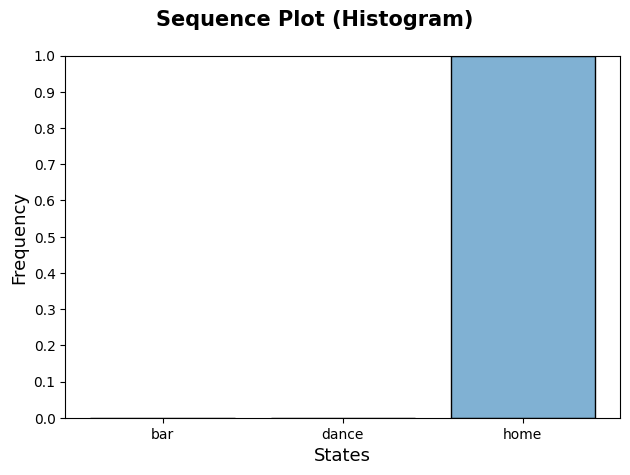

In [8]:
pydtmc.plot_sequence(deux,50,plot_type='histogram')[0]

In [9]:
n=5
p=np.random.rand(n)
p[n-1]=0
d=np.random.rand(n)
p=np.random.rand(1)*p/(p+d)
d=np.random.rand(1)*d/(p+d)
d[0]=0
model=pydtmc.MarkovChain.birth_death(p,d)


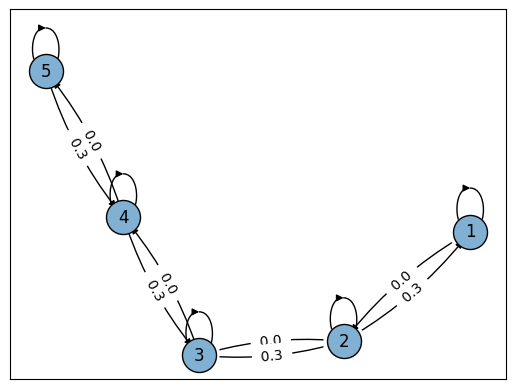

In [10]:
pydtmc.plot_graph(model)[0]

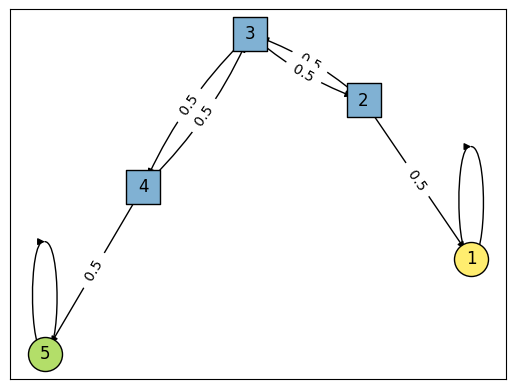

In [11]:
model=pydtmc.MarkovChain.gamblers_ruin(size=5,w=0.50)
pydtmc.plot_graph(model)[0]